# Projeto 3 - Classificação

## Motivação
Projeto de classificação incluindo tratamento de missing data, feature engineering e seleção da melhor métrica

## Objeto de Estudo

Previsão de churn (% de clientes que deixam a empresa num determinado tempo). Para resolver esse tipo de problema precisamos ter uma base histórica com clientes que saíram e não sairam da empresa, bem como suas características.

Bancos, telefonicas, varejo ou qualquer empresa que presta algum serviço e possui informações sobre seus clientes pode se beneficiar de modelos preditivos similares ao que iremos contruir.

Nesse projeto vamos ajudar a Let's Talk a manter seus clientes. Faremos um modelo para classificar os clientes em 'churn' ou 'não churn', ou seja, se irão ou não cancelar o serviço

Base: Kaggle, mas manipulado pelo curso com a inclusão de missing data adicionais, com dados fictícios demográficos e de serviços contratados pelos clientes com a informação se saiu ou não da empresa


In [1]:
#pip install scikit-learn pandas seaborn xgboost

In [2]:
#importando bibliotecas
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

#configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Configurando pandas para nao mostrar notação cientifica para numeros
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [3]:
#Ler dados da telefonica
df_clientes=pd.read_csv('./train.csv')
df_clientes.head()

id  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  4030  Female              0      No         No   56.00           No   
1  6731    Male              0     Yes        Yes     NaN          Yes   
2  6479  Female              0     Yes         No   60.00          Yes   
3  6861  Female              0      No         No   37.00          Yes   
4  3266    Male              0     Yes        Yes   29.00          Yes   

      MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0  No phone service             DSL                  Yes                  Yes   
1                No              No  No internet service  No internet service   
2               Yes     Fiber optic                   No                  Yes   
3               Yes     Fiber optic                   No                  Yes   
4                No     Fiber optic                   No                   No   

      DeviceProtection          TechSupport          StreamingTV  \
0                  Yes                  Yes                   No   
1  No internet service  No internet service  No internet service   
2                  Yes                  Yes                  Yes   
3                  Yes                   No                  Yes   
4                   No                   No                   No   

       StreamingMovies        Contract PaperlessBilling  \
0                   No        Two year               No   
1  No internet service        One year               No   
2                  Yes        Two year              Yes   
3                  Yes  Month-to-month              Yes   
4                   No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  
0                        NaN           45.05       2560.1      0  
1               Mailed check           19.65       332.65      0  
2    Credit card (automatic)          110.80       6640.7      0  
3  Bank transfer (automatic)          101.90      3545.35      1  
4           Electronic check           70.75       1974.8      1

In [4]:
df_clientes.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Cada linha é um cliente. Verificando:

In [5]:
df_clientes['id'].is_unique

True

De fato, é uma linha por cliente

In [6]:
#Transformando coluna id em indice
df_clientes = df_clientes.set_index('id')

In [7]:
df_clientes.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
id                                                                    
4030  Female              0      No         No   56.00           No   
6731    Male              0     Yes        Yes     NaN          Yes   
6479  Female              0     Yes         No   60.00          Yes   
6861  Female              0      No         No   37.00          Yes   
3266    Male              0     Yes        Yes   29.00          Yes   

         MultipleLines InternetService       OnlineSecurity  \
id                                                            
4030  No phone service             DSL                  Yes   
6731                No              No  No internet service   
6479               Yes     Fiber optic                   No   
6861               Yes     Fiber optic                   No   
3266                No     Fiber optic                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
id                                                                    
4030                  Yes                  Yes                  Yes   
6731  No internet service  No internet service  No internet service   
6479                  Yes                  Yes                  Yes   
6861                  Yes                  Yes                   No   
3266                   No                   No                   No   

              StreamingTV      StreamingMovies        Contract  \
id                                                               
4030                   No                   No        Two year   
6731  No internet service  No internet service        One year   
6479                  Yes                  Yes        Two year   
6861                  Yes                  Yes  Month-to-month   
3266                   No                   No  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
id                                                                              
4030               No                        NaN           45.05       2560.1   
6731               No               Mailed check           19.65       332.65   
6479              Yes    Credit card (automatic)          110.80       6640.7   
6861              Yes  Bank transfer (automatic)          101.90      3545.35   
3266              Yes           Electronic check           70.75       1974.8   

      Churn  
id           
4030      0  
6731      0  
6479      0  
6861      1  
3266      1

In [8]:
df_clientes.shape

(5634, 20)

In [9]:
df_clientes.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [10]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5416 non-null   object 
 4   tenure            5173 non-null   float64
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5535 non-null   object

In [11]:
df_clientes['TotalCharges'].value_counts()

20.2       8
           8
19.55      7
19.75      6
19.9       6
19.45      6
19.65      6
20.05      6
20.25      6
45.3       5
20.15      5
44.4       4
69.6       4
20.3       4
50.15      4
19.3       4
44         4
20.45      4
19.2       4
69.65      4
45.7       3
1284.2     3
20.4       3
70.1       3
49.9       3
19.85      3
470.2      3
74.35      3
20.1       3
50.45      3
35.9       3
24.4       3
50.75      3
69.55      3
74.6       3
19.95      3
220.45     3
69.9       3
20.35      3
85.5       3
70.45      3
74.7       3
69.95      3
80.55      3
75.3       3
69.1       3
70.6       3
69.25      3
45.1       3
19.5       3
383.65     3
44.75      3
25.25      3
70.3       3
1077.5     2
71.65      2
79.15      2
5714.2     2
96.8       2
20.95      2
235.05     2
4858.7     2
2104.55    2
75.35      2
2661.1     2
330.8      2
92.75      2
20.5       2
2560.1     2
469.65     2
223.15     2
300.4      2
398.55     2
86.6       2
70         2
42.9       2
145.15     2

In [12]:
#Tirando primeiro todos os espaços usando expressão regular simples \s. \s+ pega uma ou mais sequencias de espacos
df_clientes['TotalCharges']=df_clientes['TotalCharges'].replace("\s+", "", regex=True)

In [13]:
df_clientes['TotalCharges'].value_counts()

20.2       8
           8
19.55      7
19.75      6
19.9       6
19.45      6
19.65      6
20.05      6
20.25      6
45.3       5
20.15      5
44.4       4
69.6       4
20.3       4
50.15      4
19.3       4
44         4
20.45      4
19.2       4
69.65      4
45.7       3
1284.2     3
20.4       3
70.1       3
49.9       3
19.85      3
470.2      3
74.35      3
20.1       3
50.45      3
35.9       3
24.4       3
50.75      3
69.55      3
74.6       3
19.95      3
220.45     3
69.9       3
20.35      3
85.5       3
70.45      3
74.7       3
69.95      3
80.55      3
75.3       3
69.1       3
70.6       3
69.25      3
45.1       3
19.5       3
383.65     3
44.75      3
25.25      3
70.3       3
1077.5     2
71.65      2
79.15      2
5714.2     2
96.8       2
20.95      2
235.05     2
4858.7     2
2104.55    2
75.35      2
2661.1     2
330.8      2
92.75      2
20.5       2
2560.1     2
469.65     2
223.15     2
300.4      2
398.55     2
86.6       2
70         2
42.9       2
145.15     2

In [14]:
#Tentando converter para float
df_clientes['TotalCharges'].astype(float)

ValueError: could not convert string to float: ''

In [15]:
#Nao funcionou porque existem valores que nao conseguem ter conversao para float
df_clientes.loc[df_clientes['TotalCharges']==""]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
id                                                                    
6755    Male              0      No        Yes    0.00          Yes   
5219    Male              0     Yes        Yes    0.00          Yes   
6671  Female              0     Yes        Yes    0.00          Yes   
937   Female              0     Yes        Yes    0.00          Yes   
3827    Male              0     Yes        Yes    0.00          Yes   
1083    Male              0     Yes        Yes    0.00          Yes   
3332    Male              0     Yes        Yes    0.00          Yes   
1341  Female              0     Yes        Yes    0.00           No   

         MultipleLines InternetService       OnlineSecurity  \
id                                                            
6755               Yes             DSL                  Yes   
5219                No              No  No internet service   
6671               Yes             DSL                   No   
937                 No             DSL                  Yes   
3827               Yes              No  No internet service   
1083               Yes              No  No internet service   
3332                No              No  No internet service   
1341  No phone service             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
id                                                                    
6755                  Yes                   No                  Yes   
5219  No internet service  No internet service  No internet service   
6671                  Yes                  Yes                  Yes   
937                   Yes                  Yes                   No   
3827  No internet service  No internet service  No internet service   
1083  No internet service  No internet service  No internet service   
3332  No internet service  No internet service  No internet service   
1341                  Yes                  Yes                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
id                                                                          
6755                   No                   No  Two year              Yes   
5219  No internet service  No internet service  One year              Yes   
6671                  Yes                   No  Two year               No   
937                   Yes                  Yes  Two year               No   
3827  No internet service  No internet service  Two year               No   
1083  No internet service  No internet service  Two year               No   
3332  No internet service  No internet service  Two year               No   
1341                  Yes                   No  Two year               No   

                  PaymentMethod  MonthlyCharges TotalCharges  Churn  
id                                                                   
6755  Bank transfer (automatic)           61.90                   0  
5219               Mailed check           19.70                   0  
6671               Mailed check           73.35                   0  
937                Mailed check           80.85                   0  
3827               Mailed check           25.35                   0  
1083               Mailed check           25.75                   0  
3332               Mailed check           19.85                   0  
1341    Credit card (automatic)           56.05                   0

In [16]:
#Para converter, possivel utilizar to_numeric com coercao de error
df_clientes['TotalCharges'] = pd.to_numeric(df_clientes['TotalCharges'], errors='coerce')

In [17]:
df_clientes.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

## Começando com estatística descritiva

Objetivo de conehcer medidas estatísticas, de tendencia central, dispersão, separatrizes, distribuições para conhecermos melhor os dados em que estamos trabalhando. Qual a distribuição de tenure? Da cobrança mensal? Da cobrança total? A base está desbalanceada?

In [18]:
df_clientes.describe()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges   Churn
count        5634.00 5173.00         5634.00       5626.00 5634.00
mean            0.16   32.33           64.63       2273.51    0.27
std             0.37   24.46           30.02       2258.38    0.44
min             0.00    0.00           18.25         18.80    0.00
25%             0.00    9.00           35.46        401.59    0.00
50%             0.00   29.00           70.25       1396.12    0.00
75%             0.00   55.00           89.80       3764.29    1.00
max             1.00   72.00          118.75       8684.80    1.00

SeniorCitizen e Churn são discretas e podem ser ignoradas na análise acima. 
Para tenure, temos o máximos de 72 meses (6 anos). É possível inferir que os dados foram coletados nessa janela.

<Axes: xlabel='tenure', ylabel='Count'>

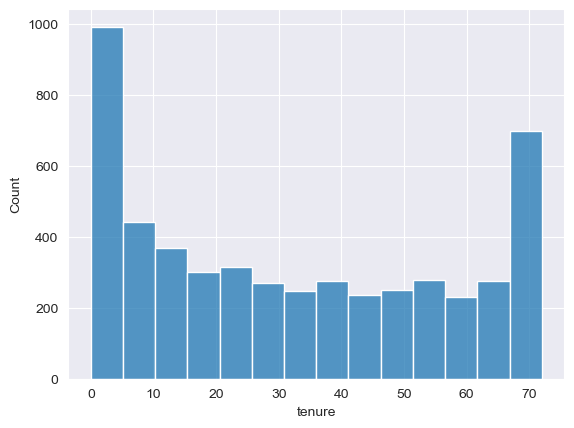

In [19]:
#Analisando a distribuição de tenure (meses na empresa)

sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_clientes, x='tenure')

In [20]:
#temos muitos valores próximos a zero, vamos avaliar?
len(df_clientes.loc[df_clientes["tenure"]<=5])


992

In [21]:
len(df_clientes.loc[df_clientes["tenure"]<=5])/df_clientes.shape[0]

0.17607383741569044

In [22]:
#Mudando o padrão de quartis para decis. linspace divide em espaços iguais um intervalo de numeros
df_clientes.describe(percentiles=np.linspace(0,1,11))

SeniorCitizen  tenure  MonthlyCharges  TotalCharges   Churn
count        5634.00 5173.00         5634.00       5626.00 5634.00
mean            0.16   32.33           64.63       2273.51    0.27
std             0.37   24.46           30.02       2258.38    0.44
min             0.00    0.00           18.25         18.80    0.00
0%              0.00    0.00           18.25         18.80    0.00
10%             0.00    2.00           20.05         85.50    0.00
20%             0.00    6.00           25.10        267.00    0.00
30%             0.00   12.00           45.80        550.98    0.00
40%             0.00   20.00           58.60        939.80    0.00
50%             0.00   29.00           70.25       1396.12    0.00
60%             0.00   39.00           78.90       2065.40    0.00
70%             0.00   50.00           85.40       3100.22    0.00
80%             0.00   60.00           94.10       4445.30    1.00
90%             1.00   69.00          102.10       5975.60    1.00
100%            1.00   72.00          118.75       8684.80    1.00
max             1.00   72.00          118.75       8684.80    1.00

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

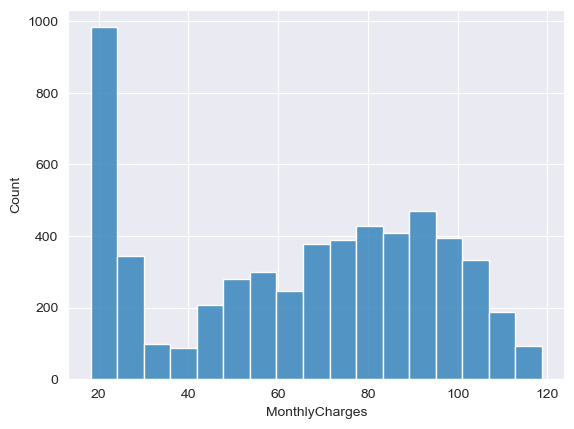

In [23]:
#Analisando a Distribuição da cobrança mensal
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_clientes, x='MonthlyCharges')


<Axes: xlabel='TotalCharges', ylabel='Count'>

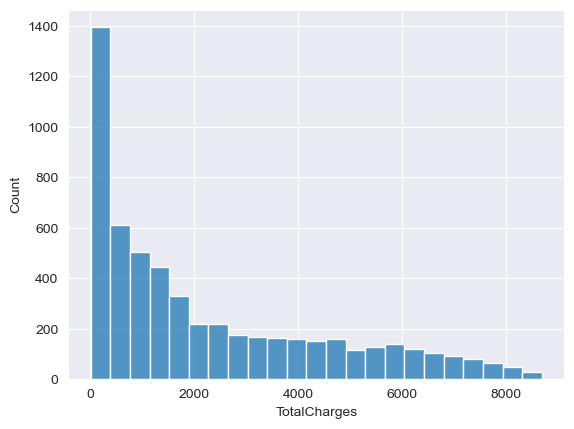

In [24]:
#Analisando a Distribuição da cobrança total
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_clientes, x='TotalCharges')

<Axes: xlabel='Churn', ylabel='count'>

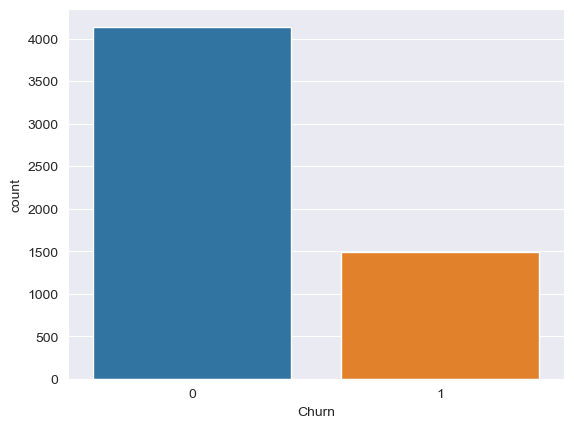

In [25]:
#Analisando a variavel target: churn (cancelou o serviço ouo nao)
sns.countplot(data=df_clientes, x="Churn")

Temos uma base bastante desbalanceada. Temos que tomar cuidado com a métrica a ser utilizada. Avaliando o desbalanceamento:

In [26]:
len(df_clientes.loc[df_clientes['Churn']==0]), len(df_clientes.loc[df_clientes['Churn']==1])

(4139, 1495)

In [27]:
#Se o modelo chutar tudo como "Nao saiu"
100*len(df_clientes.loc[df_clientes['Churn']==0])/ df_clientes.shape[0]

73.46467873624424

Ou seja, acurácia perto de 73% quer dizer que usamos machine learning para nada

## Relação entre as features e a variável target

Uma analise interessante é avaliar relações entre as variáveis preditoras com a target. vamos analisar as dispersões das variaveis preditoras com o Churn

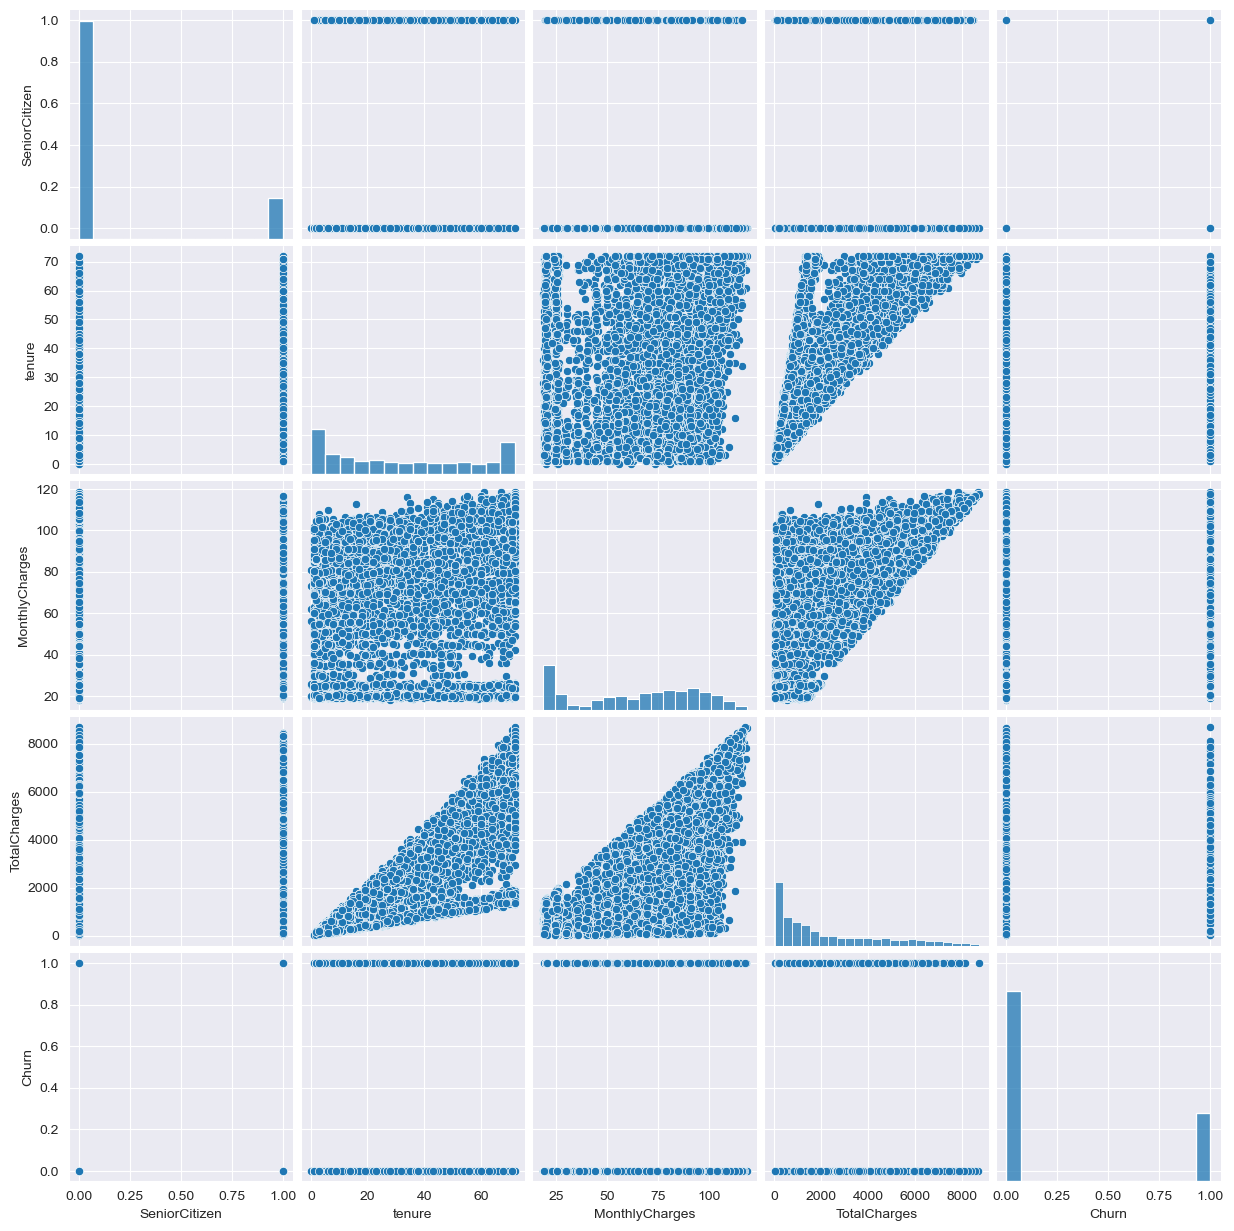

In [28]:
sns.pairplot (data=df_clientes)

Fica evidente uma correlação positiva entre tenure e cobranças totais. Alem disso, nada que chame muito a atenção com relação à variavel target

## Codificação de Variáveis Categóricas

Como os modelos de Machine Learning não sabem o que são categorias em sua maioria, devemos codificar as variáveis de sexo, parceiro(a), dependentes, tipo de cobrança e todos os tipos de serviço

In [29]:
df_clientes.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
id                                                                    
4030  Female              0      No         No   56.00           No   
6731    Male              0     Yes        Yes     NaN          Yes   
6479  Female              0     Yes         No   60.00          Yes   
6861  Female              0      No         No   37.00          Yes   
3266    Male              0     Yes        Yes   29.00          Yes   

         MultipleLines InternetService       OnlineSecurity  \
id                                                            
4030  No phone service             DSL                  Yes   
6731                No              No  No internet service   
6479               Yes     Fiber optic                   No   
6861               Yes     Fiber optic                   No   
3266                No     Fiber optic                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
id                                                                    
4030                  Yes                  Yes                  Yes   
6731  No internet service  No internet service  No internet service   
6479                  Yes                  Yes                  Yes   
6861                  Yes                  Yes                   No   
3266                   No                   No                   No   

              StreamingTV      StreamingMovies        Contract  \
id                                                               
4030                   No                   No        Two year   
6731  No internet service  No internet service        One year   
6479                  Yes                  Yes        Two year   
6861                  Yes                  Yes  Month-to-month   
3266                   No                   No  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
id                                                                 
4030               No                        NaN           45.05   
6731               No               Mailed check           19.65   
6479              Yes    Credit card (automatic)          110.80   
6861              Yes  Bank transfer (automatic)          101.90   
3266              Yes           Electronic check           70.75   

      TotalCharges  Churn  
id                         
4030       2560.10      0  
6731        332.65      0  
6479       6640.70      0  
6861       3545.35      1  
3266       1974.80      1

Vamos analisar quantas classes possuem as variáveis categóricas para saber como codificar cada uma

In [30]:
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data().columns]
colunas_categoricas

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [31]:
for coluna_categorica in colunas_categoricas:
    display(df_clientes[coluna_categorica].value_counts())

Male      2849
Female    2785
Name: gender, dtype: int64

No     2902
Yes    2732
Name: Partner, dtype: int64

No     3793
Yes    1623
Name: Dependents, dtype: int64

Yes    5082
No      552
Name: PhoneService, dtype: int64

No                  2692
Yes                 2390
No phone service     552
Name: MultipleLines, dtype: int64

Fiber optic    2451
DSL            1959
No             1224
Name: InternetService, dtype: int64

No                     2763
Yes                    1647
No internet service    1224
Name: OnlineSecurity, dtype: int64

No                     2488
Yes                    1922
No internet service    1224
Name: OnlineBackup, dtype: int64

No                     2480
Yes                    1930
No internet service    1224
Name: DeviceProtection, dtype: int64

No                     2793
Yes                    1617
No internet service    1224
Name: TechSupport, dtype: int64

No                     2240
Yes                    2170
No internet service    1224
Name: StreamingTV, dtype: int64

No                     2218
Yes                    2192
No internet service    1224
Name: StreamingMovies, dtype: int64

Month-to-month    3084
Two year          1358
One year          1192
Name: Contract, dtype: int64

Yes    3312
No     2322
Name: PaperlessBilling, dtype: int64

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: PaymentMethod, dtype: int64

As variaveis gender, partner, dependents, phone service e paperless billing possuem duas classes (sim ou não). Podemos mapea-las diretamente:


In [32]:
df_clientes['gender']=df_clientes['gender'].map({'Female':1, 'Male':0})

colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for i in colunas_binarias:
    df_clientes[i] = df_clientes[i].map({'Yes':1, 'No':0})

In [33]:
df_clientes

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
id                                                                       
4030       1              0        0        0.00   56.00             0   
6731       0              0        1        1.00     NaN             1   
6479       1              0        1        0.00   60.00             1   
6861       1              0        0        0.00   37.00             1   
3266       0              0        1        1.00   29.00             1   
6368       0              0        0        0.00   70.00             0   
5830       0              0        1        1.00   31.00             0   
4476       1              0        0        0.00    3.00             1   
1508       0              0        0        0.00   54.00             1   
2921       1              0        1        0.00   72.00             1   
3145       0              0        0        0.00    6.00             1   
333        0              0        0        0.00     NaN             1   
2140       1              0        0        0.00    7.00             1   
3427       0              0        0        0.00    1.00             1   
3379       0              0        1        0.00   72.00             1   
3163       0              0        0        0.00   19.00             1   
6471       0              0        1        1.00    8.00             1   
2350       0              0        1        1.00   72.00             1   
3756       0              0        0        0.00    4.00             1   
305        0              0        0        1.00   38.00             1   
6458       0              0        1        1.00   17.00             0   
1124       0              0        1        1.00   25.00             1   
670        1              0        1        0.00   70.00             0   
878        1              0        0        1.00   51.00             0   
1507       0              0        1        0.00   68.00             0   
2258       1              0        0        0.00   60.00             1   
4152       1              1        0        0.00   57.00             0   
4416       0              0        1        0.00   66.00             1   
2989       0              0        1        0.00   72.00             1   
520        0              0        0        0.00   12.00             1   
5701       0              1        1        0.00   29.00             1   
4982       0              0        0        0.00   14.00             0   
2187       0              0        1        1.00   46.00             1   
3008       1              1        0        0.00   32.00             1   
956        0              0        1        0.00     NaN             1   
2866       1              0        1        1.00   66.00             1   
982        0              0        1        1.00   40.00             1   
3762       1              0        1        0.00   72.00             1   
2295       0              0        0        0.00   12.00             1   
4733       1              0        1        1.00   71.00             1   
979        0              1        1        0.00   62.00             1   
192        0              0        1        0.00    6.00             1   
676        0              1        0        0.00   65.00             1   
3451       0              1        1        0.00   70.00             1   
4322       1              1        0        0.00   14.00             1   
3331       0              1        0        0.00     NaN             1   
6666       0              0        1        1.00   43.00             0   
925        1              1        0        0.00   22.00             1   
3090       1              0        0        0.00   68.00             1   
5755       1              0        1        1.00   22.00             1   
741        1              0        0        0.00   47.00             1   
4226       0              0        1        0.00    8.00             1   
2020      

In [34]:
display(df_clientes['gender'].value_counts())

for colunas_binaria in colunas_binarias:
    display(df_clientes[colunas_binaria].value_counts())

0    2849
1    2785
Name: gender, dtype: int64

0    2902
1    2732
Name: Partner, dtype: int64

0.00    3793
1.00    1623
Name: Dependents, dtype: int64

1    5082
0     552
Name: PhoneService, dtype: int64

1    3312
0    2322
Name: PaperlessBilling, dtype: int64

In [35]:
#Por que temos uma diferença na variável dependente?
df_clientes.loc[:, colunas_binarias + ['gender']].isnull().sum()

Partner               0
Dependents          218
PhoneService          0
PaperlessBilling      0
gender                0
dtype: int64

Para outras variaveis podemos avaliar quais podem ser ordinais para utilizar codificação ordinal.

In [36]:
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data().columns]
colunas_categoricas

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [37]:
for coluna_categorica in colunas_categoricas:
    display(df_clientes[coluna_categorica].value_counts())

No                  2692
Yes                 2390
No phone service     552
Name: MultipleLines, dtype: int64

Fiber optic    2451
DSL            1959
No             1224
Name: InternetService, dtype: int64

No                     2763
Yes                    1647
No internet service    1224
Name: OnlineSecurity, dtype: int64

No                     2488
Yes                    1922
No internet service    1224
Name: OnlineBackup, dtype: int64

No                     2480
Yes                    1930
No internet service    1224
Name: DeviceProtection, dtype: int64

No                     2793
Yes                    1617
No internet service    1224
Name: TechSupport, dtype: int64

No                     2240
Yes                    2170
No internet service    1224
Name: StreamingTV, dtype: int64

No                     2218
Yes                    2192
No internet service    1224
Name: StreamingMovies, dtype: int64

Month-to-month    3084
Two year          1358
One year          1192
Name: Contract, dtype: int64

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: PaymentMethod, dtype: int64

Podemos inferir que contract é ordinal, pois possui claramente uma diferença entre od tipos de contrato mensais, anuais e bianuais. Outra que podemos ordenar são InternetService e PaymentMethod.

In [38]:
df_clientes['Contract']=df_clientes['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
df_clientes['InternetService']=df_clientes['InternetService'].map({'No':0, 'DSL':1, 'Fiber optic':2 })
df_clientes['PaymentMethod']=df_clientes['PaymentMethod'].map({'Mailed check':0, 'Electronic check':1,'Bank transfer (automatic)':2, 'Credit card (automatic)':3})

df_clientes.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
id                                                                       
4030       1              0        0        0.00   56.00             0   
6731       0              0        1        1.00     NaN             1   
6479       1              0        1        0.00   60.00             1   
6861       1              0        0        0.00   37.00             1   
3266       0              0        1        1.00   29.00             1   

         MultipleLines  InternetService       OnlineSecurity  \
id                                                             
4030  No phone service                1                  Yes   
6731                No                0  No internet service   
6479               Yes                2                   No   
6861               Yes                2                   No   
3266                No                2                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
id                                                                    
4030                  Yes                  Yes                  Yes   
6731  No internet service  No internet service  No internet service   
6479                  Yes                  Yes                  Yes   
6861                  Yes                  Yes                   No   
3266                   No                   No                   No   

              StreamingTV      StreamingMovies  Contract  PaperlessBilling  \
id                                                                           
4030                   No                   No         2                 0   
6731  No internet service  No internet service         1                 0   
6479                  Yes                  Yes         2                 1   
6861                  Yes                  Yes         0                 1   
3266                   No                   No         0                 1   

      PaymentMethod  MonthlyCharges  TotalCharges  Churn  
id                                                        
4030            NaN           45.05       2560.10      0  
6731           0.00           19.65        332.65      0  
6479           3.00          110.80       6640.70      0  
6861           2.00          101.90       3545.35      1  
3266           1.00           70.75       1974.80      1

In [39]:
df_clientes.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents          float64
tenure              float64
PhoneService          int64
MultipleLines        object
InternetService       int64
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract              int64
PaperlessBilling      int64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

Para as outras variaveis, vamos de one hot encoding

In [40]:
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data().columns]
colunas_categoricas

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [41]:
#Vamos utilizar OHE para variaveis categoricas nominais
from sklearn.preprocessing import OneHotEncoder

In [42]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
df_ohe_transformadas = ohe.fit_transform(df_clientes[colunas_categoricas])
ohe.categories_

[array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object)]

In [43]:
ohe.get_feature_names_out()

array(['MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype=object)

Vamos apensar essas novas colunas no dataframe de clientes e remover as originais

In [44]:
df_ohe_transformadas

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [45]:
#Transformando o array numpy em colunas
df_ohe_transformadas = pd.DataFrame(data=df_ohe_transformadas, columns = ohe.get_feature_names_out(), index = df_clientes.index)
df_ohe_transformadas.head()

MultipleLines_No phone service  MultipleLines_Yes  \
id                                                        
4030                            1.00               0.00   
6731                            0.00               0.00   
6479                            0.00               1.00   
6861                            0.00               1.00   
3266                            0.00               0.00   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  \
id                                                             
4030                                0.00                1.00   
6731                                1.00                0.00   
6479                                0.00                0.00   
6861                                0.00                0.00   
3266                                0.00                0.00   

      OnlineBackup_No internet service  OnlineBackup_Yes  \
id                                                         
4030                              0.00              1.00   
6731                              1.00              0.00   
6479                              0.00              1.00   
6861                              0.00              1.00   
3266                              0.00              0.00   

      DeviceProtection_No internet service  DeviceProtection_Yes  \
id                                                                 
4030                                  0.00                  1.00   
6731                                  1.00                  0.00   
6479                                  0.00                  1.00   
6861                                  0.00                  1.00   
3266                                  0.00                  0.00   

      TechSupport_No internet service  TechSupport_Yes  \
id                                                       
4030                             0.00             1.00   
6731                             1.00             0.00   
6479                             0.00             1.00   
6861                             0.00             0.00   
3266                             0.00             0.00   

      StreamingTV_No internet service  StreamingTV_Yes  \
id                                                       
4030                             0.00             0.00   
6731                             1.00             0.00   
6479                             0.00             1.00   
6861                             0.00             1.00   
3266                             0.00             0.00   

      StreamingMovies_No internet service  StreamingMovies_Yes  
id                                                              
4030                                 0.00                 0.00  
6731                                 1.00                 0.00  
6479                                 0.00                 1.00  
6861                                 0.00                 1.00  
3266                                 0.00                 0.00

In [46]:
df_ohe_transformadas.shape

(5634, 14)

In [47]:
#Juntando os datasets; axis = 0 junta as linhas, axis = 1 junta colunas
df_clientes = pd.concat([df_clientes, df_ohe_transformadas], axis=1)
df_clientes.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
id                                                                       
4030       1              0        0        0.00   56.00             0   
6731       0              0        1        1.00     NaN             1   
6479       1              0        1        0.00   60.00             1   
6861       1              0        0        0.00   37.00             1   
3266       0              0        1        1.00   29.00             1   

         MultipleLines  InternetService       OnlineSecurity  \
id                                                             
4030  No phone service                1                  Yes   
6731                No                0  No internet service   
6479               Yes                2                   No   
6861               Yes                2                   No   
3266                No                2                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
id                                                                    
4030                  Yes                  Yes                  Yes   
6731  No internet service  No internet service  No internet service   
6479                  Yes                  Yes                  Yes   
6861                  Yes                  Yes                   No   
3266                   No                   No                   No   

              StreamingTV      StreamingMovies  Contract  PaperlessBilling  \
id                                                                           
4030                   No                   No         2                 0   
6731  No internet service  No internet service         1                 0   
6479                  Yes                  Yes         2                 1   
6861                  Yes                  Yes         0                 1   
3266                   No                   No         0                 1   

      PaymentMethod  MonthlyCharges  TotalCharges  Churn  \
id                                                         
4030            NaN           45.05       2560.10      0   
6731           0.00           19.65        332.65      0   
6479           3.00          110.80       6640.70      0   
6861           2.00          101.90       3545.35      1   
3266           1.00           70.75       1974.80      1   

      MultipleLines_No phone service  MultipleLines_Yes  \
id                                                        
4030                            1.00               0.00   
6731                            0.00               0.00   
6479                            0.00               1.00   
6861                            0.00               1.00   
3266                            0.00               0.00   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  \
id                                                             
4030                                0.00                1.00   
6731                                1.00                0.00   
6479                                0.00                0.00   
6861                                0.00                0.00   
3266                                0.00                0.00   

      OnlineBackup_No internet service  OnlineBackup_Yes  \
id                                                         
4030                              0.00              1.00   
6731                              1.00              0.00   
6479                              0.00              1.00   
6861                              0.00              1.00   
3266                              0.00              0.00   

      DeviceProtection_No internet service  DeviceProtection_Yes  \
id                                                                 
4030                                  0.00                  1.00   
6731                                  1.00                  0.00   
6479            

In [48]:
colunas_categoricas

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [49]:
# deletando as colunas originais

df_clientes=df_clientes.drop(colunas_categoricas, axis=1)
df_clientes.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
id                                                                       
4030       1              0        0        0.00   56.00             0   
6731       0              0        1        1.00     NaN             1   
6479       1              0        1        0.00   60.00             1   
6861       1              0        0        0.00   37.00             1   
3266       0              0        1        1.00   29.00             1   

      InternetService  Contract  PaperlessBilling  PaymentMethod  \
id                                                                 
4030                1         2                 0            NaN   
6731                0         1                 0           0.00   
6479                2         2                 1           3.00   
6861                2         0                 1           2.00   
3266                2         0                 1           1.00   

      MonthlyCharges  TotalCharges  Churn  MultipleLines_No phone service  \
id                                                                          
4030           45.05       2560.10      0                            1.00   
6731           19.65        332.65      0                            0.00   
6479          110.80       6640.70      0                            0.00   
6861          101.90       3545.35      1                            0.00   
3266           70.75       1974.80      1                            0.00   

      MultipleLines_Yes  OnlineSecurity_No internet service  \
id                                                            
4030               0.00                                0.00   
6731               0.00                                1.00   
6479               1.00                                0.00   
6861               1.00                                0.00   
3266               0.00                                0.00   

      OnlineSecurity_Yes  OnlineBackup_No internet service  OnlineBackup_Yes  \
id                                                                             
4030                1.00                              0.00              1.00   
6731                0.00                              1.00              0.00   
6479                0.00                              0.00              1.00   
6861                0.00                              0.00              1.00   
3266                0.00                              0.00              0.00   

      DeviceProtection_No internet service  DeviceProtection_Yes  \
id                                                                 
4030                                  0.00                  1.00   
6731                                  1.00                  0.00   
6479                                  0.00                  1.00   
6861                                  0.00                  1.00   
3266                                  0.00                  0.00   

      TechSupport_No internet service  TechSupport_Yes  \
id                                                       
4030                             0.00             1.00   
6731                             1.00             0.00   
6479                             0.00             1.00   
6861                             0.00             0.00   
3266                             0.00             0.00   

      StreamingTV_No internet service  StreamingTV_Yes  \
id                                                       
4030                             0.00             0.00   
6731                             1.00             0.00   
6479                             0.00             1.00   
6861                             0.00             1.00   
3266                             0.00             0.00   

      StreamingMovies_No internet service  StreamingMovies_Yes  
id                                                              
4030                                 0.00     

In [50]:
df_clientes.dtypes

gender                                    int64
SeniorCitizen                             int64
Partner                                   int64
Dependents                              float64
tenure                                  float64
PhoneService                              int64
InternetService                           int64
Contract                                  int64
PaperlessBilling                          int64
PaymentMethod                           float64
MonthlyCharges                          float64
TotalCharges                            float64
Churn                                     int64
MultipleLines_No phone service          float64
MultipleLines_Yes                       float64
OnlineSecurity_No internet service      float64
OnlineSecurity_Yes                      float64
OnlineBackup_No internet service        float64
OnlineBackup_Yes                        float64
DeviceProtection_No internet service    float64
DeviceProtection_Yes                    

Agora todas as variaveis são numericas

In [51]:
df_clientes.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [52]:
X=df_clientes.drop('Churn', axis =1) #tirando a variavel dependente
y=df_clientes[['Churn']] #extraindo a variavel dependente

In [53]:
X.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
id                                                                       
4030       1              0        0        0.00   56.00             0   
6731       0              0        1        1.00     NaN             1   
6479       1              0        1        0.00   60.00             1   
6861       1              0        0        0.00   37.00             1   
3266       0              0        1        1.00   29.00             1   

      InternetService  Contract  PaperlessBilling  PaymentMethod  \
id                                                                 
4030                1         2                 0            NaN   
6731                0         1                 0           0.00   
6479                2         2                 1           3.00   
6861                2         0                 1           2.00   
3266                2         0                 1           1.00   

      MonthlyCharges  TotalCharges  MultipleLines_No phone service  \
id                                                                   
4030           45.05       2560.10                            1.00   
6731           19.65        332.65                            0.00   
6479          110.80       6640.70                            0.00   
6861          101.90       3545.35                            0.00   
3266           70.75       1974.80                            0.00   

      MultipleLines_Yes  OnlineSecurity_No internet service  \
id                                                            
4030               0.00                                0.00   
6731               0.00                                1.00   
6479               1.00                                0.00   
6861               1.00                                0.00   
3266               0.00                                0.00   

      OnlineSecurity_Yes  OnlineBackup_No internet service  OnlineBackup_Yes  \
id                                                                             
4030                1.00                              0.00              1.00   
6731                0.00                              1.00              0.00   
6479                0.00                              0.00              1.00   
6861                0.00                              0.00              1.00   
3266                0.00                              0.00              0.00   

      DeviceProtection_No internet service  DeviceProtection_Yes  \
id                                                                 
4030                                  0.00                  1.00   
6731                                  1.00                  0.00   
6479                                  0.00                  1.00   
6861                                  0.00                  1.00   
3266                                  0.00                  0.00   

      TechSupport_No internet service  TechSupport_Yes  \
id                                                       
4030                             0.00             1.00   
6731                             1.00             0.00   
6479                             0.00             1.00   
6861                             0.00             0.00   
3266                             0.00             0.00   

      StreamingTV_No internet service  StreamingTV_Yes  \
id                                                       
4030                             0.00             0.00   
6731                             1.00             0.00   
6479                             0.00             1.00   
6861                             0.00             1.00   
3266                             0.00             0.00   

      StreamingMovies_No internet service  StreamingMovies_Yes  
id                                                              
4030                                 0.00                 0.00  
6731                          

In [54]:
y.head()

Churn
id         
4030      0
6731      0
6479      0
6861      1
3266      1

# Separação de bases

In [55]:
#Separando nossa base em treino e teste
from sklearn.model_selection import train_test_split

In [56]:
#Devolve uma tupla com 4 elementos: X de treino, X de teste, y de treino, y de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=.2,random_state=42)

X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((4507, 26), (1127, 26), (4507, 1), (1127, 1))

In [57]:
X_treino.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
id                                                                       
3559       0              0        1         NaN   28.00             1   
896        0              0        0        0.00   30.00             1   
3600       1              0        1        1.00   45.00             1   
6991       0              0        1        0.00   36.00             1   
5455       1              1        1        0.00    1.00             1   

      InternetService  Contract  PaperlessBilling  PaymentMethod  \
id                                                                 
3559                2         1                 0           2.00   
896                 2         0                 1            NaN   
3600                1         0                 0           0.00   
6991                2         0                 1           1.00   
5455                2         0                 1           1.00   

      MonthlyCharges  TotalCharges  MultipleLines_No phone service  \
id                                                                   
3559           92.20       2568.15                            0.00   
896            94.30       2679.70                            0.00   
3600           81.30       3541.10                            0.00   
6991           93.60       3366.05                            0.00   
5455           69.55         69.55                            0.00   

      MultipleLines_Yes  OnlineSecurity_No internet service  \
id                                                            
3559               1.00                                0.00   
896                1.00                                0.00   
3600               1.00                                0.00   
6991               0.00                                0.00   
5455               0.00                                0.00   

      OnlineSecurity_Yes  OnlineBackup_No internet service  OnlineBackup_Yes  \
id                                                                             
3559                0.00                              0.00              0.00   
896                 1.00                              0.00              1.00   
3600                1.00                              0.00              1.00   
6991                1.00                              0.00              0.00   
5455                0.00                              0.00              0.00   

      DeviceProtection_No internet service  DeviceProtection_Yes  \
id                                                                 
3559                                  0.00                  0.00   
896                                   0.00                  0.00   
3600                                  0.00                  1.00   
6991                                  0.00                  0.00   
5455                                  0.00                  0.00   

      TechSupport_No internet service  TechSupport_Yes  \
id                                                       
3559                             0.00             0.00   
896                              0.00             0.00   
3600                             0.00             1.00   
6991                             0.00             0.00   
5455                             0.00             0.00   

      StreamingTV_No internet service  StreamingTV_Yes  \
id                                                       
3559                             0.00             1.00   
896                              0.00             0.00   
3600                             0.00             1.00   
6991                             0.00             1.00   
5455                             0.00             0.00   

      StreamingMovies_No internet service  StreamingMovies_Yes  
id                                                              
3559                                 0.00                 1.00  
896                           

In [58]:
y_treino.head()

Churn
id         
3559      0
896       0
3600      0
6991      0
5455      1

## Tratamento de missing data

In [59]:
X_treino.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                              171
tenure                                  366
PhoneService                              0
InternetService                           0
Contract                                  0
PaperlessBilling                          0
PaymentMethod                            78
MonthlyCharges                            0
TotalCharges                              6
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service 

In [60]:
X_teste.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                              47
tenure                                  95
PhoneService                             0
InternetService                          0
Contract                                 0
PaperlessBilling                         0
PaymentMethod                           21
MonthlyCharges                           0
TotalCharges                             2
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

Existem diversas formas de tratar missing data, as formas podem inclusive ser testadas (com cross validation) para avaliar qual é a mais robusta para performance do modelo. Vamos testar algumas durante os treinamentos.

In [61]:
#A mais simples: medidas de tendencia central
#Antes disso, vamos guardar os X originais para tentar outras formas mais tarde

X_treino_original = X_treino.copy()
X_teste_original = X_teste.copy()

y_treino_original = y_treino.copy()
y_teste_original = y_teste.copy()

In [62]:
X_treino.loc[:, X_treino.isnull().sum() > 0].columns

Index(['Dependents', 'tenure', 'PaymentMethod', 'TotalCharges'], dtype='object')

In [63]:
X_teste.loc[:, X_teste.isnull().sum() >0].columns


Index(['Dependents', 'tenure', 'PaymentMethod', 'TotalCharges'], dtype='object')

In [64]:
#Para as variaveis numericas vamos utilizar a mediana, para as categoricas, a moda

mediana_tenure = X_treino['tenure'].median()
mediana_dependents = X_treino['Dependents'].median()
mediana_total_charges = X_treino['TotalCharges'].median()
moda_payment_method = X_treino['PaymentMethod'].value_counts().index[0]

mediana_tenure, mediana_dependents, mediana_total_charges, moda_payment_method


(29.0, 0.0, 1389.6, 1.0)

In [65]:
X_treino.loc[X_treino['tenure'].isnull(), 'tenure'] = mediana_tenure
X_treino.loc[X_treino['Dependents'].isnull(), 'Dependents'] = mediana_dependents
X_treino.loc[X_treino['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_treino.loc[X_treino['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment_method

X_treino.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

## Treinando o modelo de Machine Learning

O primeiro modelo a ser testado será a Regressão Logística

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [67]:
#Criando o estimador (preditor)
#vamos alterar o numero de iterações

regressao_logistica = LogisticRegression(max_iter=500)

#Treinar usando cross validation
valores_f1_rl = cross_val_score(estimator=regressao_logistica,
                               X=X_treino,
                               y=y_treino.values.flatten(),
                               cv=10,
                               scoring='f1')

valores_f1_rl

array([0.61946903, 0.63478261, 0.60262009, 0.55111111, 0.6367713 ,
       0.64377682, 0.68122271, 0.58035714, 0.56038647, 0.60792952])

In [68]:
len(valores_f1_rl)

10

In [69]:
media_f1_rl = valores_f1_rl.mean()
f'f1-score:{media_f1_rl*100}'

'f1-score:61.184267973036235'

O segundo modelo a ser testado será o Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

valores_f1_rf = cross_val_score(estimator=random_forest,
                               X=X_treino,
                               y=y_treino.values.flatten(),
                               cv=10,
                               scoring='f1')
valores_f1_rf

array([0.5915493 , 0.5915493 , 0.59574468, 0.45283019, 0.59803922,
       0.60185185, 0.59907834, 0.54883721, 0.53521127, 0.60747664])

In [71]:
media_f1_rf = valores_f1_rf.mean()
f'f1-score:{media_f1_rf*100}'

'f1-score:57.22167982053534'

Testando agora o XGBoost

In [72]:
import xgboost as xgb

In [73]:
xgb_model = xgb.XGBClassifier(random_state=42, objective='binary:logistic', use_label_encoder = False, eval_metric='error');

valores_f1_xgb = cross_val_score(estimator=xgb_model,
                               X=X_treino,
                               y=y_treino.values.flatten(),
                               cv=10,
                               scoring='f1');
valores_f1_xgb

C:\Users\horiu\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\horiu\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\horiu\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\horiu\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\horiu\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\horiu\anaconda3\lib\site-packages\xgboost\sklearn.p

array([0.55605381, 0.60344828, 0.58723404, 0.48181818, 0.57009346,
       0.59728507, 0.5814978 , 0.56140351, 0.54716981, 0.59459459])

In [74]:
media_f1_xgb = valores_f1_xgb.mean()
f'f1-score:{media_f1_xgb*100}'

'f1-score:56.805985497539716'

Após os testes, o modelo de Regressão Logística foi o que teve melhor desempenho.

## Feature Engineering

Inicialmente, vamos retornar aos dados faltantes

In [75]:
X.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                              218
tenure                                  461
PhoneService                              0
InternetService                           0
Contract                                  0
PaperlessBilling                          0
PaymentMethod                            99
MonthlyCharges                            0
TotalCharges                              8
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service 

Temos que tenure apresenta um numero relevante de dados faltantes. É possivel inferir algo melhor que a mediana para os dados faltantes? Utilizando os dados de cobrança mensal e total, podemos dividir a cobrança total pelo numero de meses para uma melhor aproximação.

In [76]:
X_treino['tenure']=X_treino_original['tenure']
X_teste['tenure']=X_teste_original['tenure']

In [77]:
X_treino['tenure'].isnull().sum()

366

In [78]:
X_teste['tenure'].isnull().sum()

95

In [79]:
X_treino.loc[X_treino['tenure'].isna(), 'tenure']=X_treino.loc[X_treino['tenure'].isna(), 'TotalCharges']/X_treino.loc[X_treino['tenure'].isna(), 'MonthlyCharges']

In [80]:
len(X_treino.loc[X_treino['tenure'].isna()])

0

In [81]:
#Testando o modelo com difetente input de missing data
rl_2=LogisticRegression(max_iter=500)

valores_f1_rl2 = cross_val_score(estimator=rl_2,
                               X=X_treino,
                               y=y_treino.values.flatten(),
                               cv=10,
                               scoring='f1')
valores_f1_rl2


array([0.60714286, 0.64935065, 0.60606061, 0.56140351, 0.65198238,
       0.65      , 0.65236052, 0.62608696, 0.59907834, 0.64      ])

In [82]:
media_f1_rl2 = valores_f1_rl2.mean()
f'f1-score:{media_f1_rl2*100}'

'f1-score:62.434658127376906'

Para a varaivel Dependents, vamos utilizar o K nearest neighbors, que busca similaridades entre pontos vizinhos para predizer algum valor ou classe

In [83]:
X_treino['Dependents']=X_treino_original['Dependents']
X_treino['Dependents'].isnull().sum()

171

In [84]:
from sklearn.impute import KNNImputer

imputacao_knn = KNNImputer(n_neighbors=2)
treino_imputado = imputacao_knn.fit_transform(X_treino)
treino_imputado

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [85]:
imputacao_knn.feature_names_in_

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype=object)

In [86]:
treino_imputado.shape

(4507, 26)

In [87]:
treino_imputado[:,3]

array([0.5, 0. , 1. , ..., 0.5, 1. , 1. ])

In [88]:
X_treino['Dependents']=treino_imputado[:,3]
X_treino['Dependents'].isnull().sum()

0

In [89]:
X_treino.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
id                                                                       
3559       0              0        1        0.50   28.00             1   
896        0              0        0        0.00   30.00             1   
3600       1              0        1        1.00   45.00             1   
6991       0              0        1        0.00   36.00             1   
5455       1              1        1        0.00    1.00             1   

      InternetService  Contract  PaperlessBilling  PaymentMethod  \
id                                                                 
3559                2         1                 0           2.00   
896                 2         0                 1           1.00   
3600                1         0                 0           0.00   
6991                2         0                 1           1.00   
5455                2         0                 1           1.00   

      MonthlyCharges  TotalCharges  MultipleLines_No phone service  \
id                                                                   
3559           92.20       2568.15                            0.00   
896            94.30       2679.70                            0.00   
3600           81.30       3541.10                            0.00   
6991           93.60       3366.05                            0.00   
5455           69.55         69.55                            0.00   

      MultipleLines_Yes  OnlineSecurity_No internet service  \
id                                                            
3559               1.00                                0.00   
896                1.00                                0.00   
3600               1.00                                0.00   
6991               0.00                                0.00   
5455               0.00                                0.00   

      OnlineSecurity_Yes  OnlineBackup_No internet service  OnlineBackup_Yes  \
id                                                                             
3559                0.00                              0.00              0.00   
896                 1.00                              0.00              1.00   
3600                1.00                              0.00              1.00   
6991                1.00                              0.00              0.00   
5455                0.00                              0.00              0.00   

      DeviceProtection_No internet service  DeviceProtection_Yes  \
id                                                                 
3559                                  0.00                  0.00   
896                                   0.00                  0.00   
3600                                  0.00                  1.00   
6991                                  0.00                  0.00   
5455                                  0.00                  0.00   

      TechSupport_No internet service  TechSupport_Yes  \
id                                                       
3559                             0.00             0.00   
896                              0.00             0.00   
3600                             0.00             1.00   
6991                             0.00             0.00   
5455                             0.00             0.00   

      StreamingTV_No internet service  StreamingTV_Yes  \
id                                                       
3559                             0.00             1.00   
896                              0.00             0.00   
3600                             0.00             1.00   
6991                             0.00             1.00   
5455                             0.00             0.00   

      StreamingMovies_No internet service  StreamingMovies_Yes  
id                                                              
3559                                 0.00                 1.00  
896                           

In [90]:
#Testando o modelo com diferente input de missing data para dependents
rl_3 = LogisticRegression(max_iter=500)

valores_f1_rl3 = cross_val_score(estimator=rl_3,
                               X=X_treino,
                               y=y_treino.values.flatten(),
                               cv=10,
                               scoring='f1')
valores_f1_rl3

array([0.61607143, 0.65217391, 0.63203463, 0.56      , 0.6460177 ,
       0.64978903, 0.66666667, 0.60869565, 0.58215962, 0.64      ])

In [91]:
media_f1_rl3 = valores_f1_rl3.mean()
f'f1-score:{media_f1_rl3*100}'

'f1-score:62.53608645554174'

Criando novas variaveis categoricas binarias

In [92]:
#O cliente tem ou nao internet
X_treino['tem_internet']=X_treino['InternetService'].isin([1,2]).astype(int)

#Possui alguma fidelidade?
X_treino['tem_fidelidade'] = X_treino['Contract'].isin([1,2]).astype(int)

#Contando a quantidade de serviços que o cliente tem contratado
X_treino['numero_de_servicos']=X_treino['tem_internet'] + X_treino['OnlineSecurity_Yes'] + X_treino['MultipleLines_Yes'] + X_treino['OnlineBackup_Yes']+X_treino['DeviceProtection_Yes']+X_treino['TechSupport_Yes']+X_treino['StreamingTV_Yes']+X_treino['StreamingMovies_Yes']+X_treino['PhoneService']


#Criar media de cobrança por serviço
X_treino['media_cobranca_por_servico'] = X_treino['MonthlyCharges']/X_treino['numero_de_servicos']

X_treino.head()


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
id                                                                       
3559       0              0        1        0.50   28.00             1   
896        0              0        0        0.00   30.00             1   
3600       1              0        1        1.00   45.00             1   
6991       0              0        1        0.00   36.00             1   
5455       1              1        1        0.00    1.00             1   

      InternetService  Contract  PaperlessBilling  PaymentMethod  \
id                                                                 
3559                2         1                 0           2.00   
896                 2         0                 1           1.00   
3600                1         0                 0           0.00   
6991                2         0                 1           1.00   
5455                2         0                 1           1.00   

      MonthlyCharges  TotalCharges  MultipleLines_No phone service  \
id                                                                   
3559           92.20       2568.15                            0.00   
896            94.30       2679.70                            0.00   
3600           81.30       3541.10                            0.00   
6991           93.60       3366.05                            0.00   
5455           69.55         69.55                            0.00   

      MultipleLines_Yes  OnlineSecurity_No internet service  \
id                                                            
3559               1.00                                0.00   
896                1.00                                0.00   
3600               1.00                                0.00   
6991               0.00                                0.00   
5455               0.00                                0.00   

      OnlineSecurity_Yes  OnlineBackup_No internet service  OnlineBackup_Yes  \
id                                                                             
3559                0.00                              0.00              0.00   
896                 1.00                              0.00              1.00   
3600                1.00                              0.00              1.00   
6991                1.00                              0.00              0.00   
5455                0.00                              0.00              0.00   

      DeviceProtection_No internet service  DeviceProtection_Yes  \
id                                                                 
3559                                  0.00                  0.00   
896                                   0.00                  0.00   
3600                                  0.00                  1.00   
6991                                  0.00                  0.00   
5455                                  0.00                  0.00   

      TechSupport_No internet service  TechSupport_Yes  \
id                                                       
3559                             0.00             0.00   
896                              0.00             0.00   
3600                             0.00             1.00   
6991                             0.00             0.00   
5455                             0.00             0.00   

      StreamingTV_No internet service  StreamingTV_Yes  \
id                                                       
3559                             0.00             1.00   
896                              0.00             0.00   
3600                             0.00             1.00   
6991                             0.00             1.00   
5455                             0.00             0.00   

      StreamingMovies_No internet service  StreamingMovies_Yes  tem_internet  \
id                                                                             
3559                                 0.00                 1.00   

In [93]:
#Testando o mdoelo com os novos inputs

rl_4 = LogisticRegression(max_iter=500)

valores_f1_rl4 = cross_val_score(estimator=rl_4,
                               X=X_treino,
                               y=y_treino.values.flatten(),
                               cv=10,
                               scoring='f1')
valores_f1_rl4

array([0.64317181, 0.64888889, 0.62280702, 0.57894737, 0.63436123,
       0.65306122, 0.65517241, 0.60714286, 0.59259259, 0.63436123])

In [94]:
media_f1_rl4 = valores_f1_rl4.mean()
f'f1-score:{media_f1_rl4*100}'

'f1-score:62.70506635999903'

# Modelo Campeão


O modelo campeão foi a regressão logistica utilizando todos os pontos de feature engineering levantados acima

In [95]:
X_teste = X_teste_original

In [96]:
X_teste.loc[X_teste['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_teste.loc[X_teste['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment_method

X_teste.loc[X_teste['tenure'].isna(), 'tenure']=X_teste.loc[X_teste['tenure'].isna(), 'TotalCharges']/X_teste.loc[X_teste['tenure'].isna(), 'MonthlyCharges']

teste_imputado = imputacao_knn.transform(X_teste)
X_teste['Dependents']=teste_imputado[:,3]

#O cliente tem ou nao internet
X_teste['tem_internet']=X_teste['InternetService'].isin([1,2]).astype(int)

#Possui alguma fidelidade?
X_teste['tem_fidelidade'] = X_teste['Contract'].isin([1,2]).astype(int)

#Contando a quantidade de serviços que o cliente tem contratado
X_teste['numero_de_servicos']=X_teste['tem_internet'] + X_teste['OnlineSecurity_Yes'] + X_teste['MultipleLines_Yes'] + X_teste['OnlineBackup_Yes']+X_teste['DeviceProtection_Yes']+X_teste['TechSupport_Yes']+X_teste['StreamingTV_Yes']+X_teste['StreamingMovies_Yes']+X_teste['PhoneService']

#Criar media de cobrança por serviço
X_teste['media_cobranca_por_servico'] = X_teste['MonthlyCharges']/X_teste['numero_de_servicos']

In [97]:
X_teste.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

In [98]:
regressao_logistica.fit(X_treino, y_treino.values.flatten())

LogisticRegression(max_iter=500)

In [100]:
regressao_logistica.coef_

array([[ 7.86536874e-03,  3.44978905e-01, -3.82390560e-02,
        -1.23572864e-01, -7.01184067e-02, -4.31922425e-01,
         2.49449379e-01, -4.81239071e-01,  4.59512382e-01,
        -1.23718078e-03,  2.38142051e-02,  4.40589745e-04,
         2.88210274e-01,  3.55766936e-01, -1.10499092e-01,
        -4.10148233e-01, -1.10499092e-01, -8.57600727e-02,
        -1.10499092e-01,  1.78277133e-03, -1.10499092e-01,
        -2.73939005e-01, -1.10499092e-01,  3.14369383e-01,
        -1.10499092e-01,  2.26282029e-01, -3.32130592e-02,
        -2.36354560e-01, -3.36781675e-01, -1.58381938e-02]])

In [101]:
df_coeficientes = pd.DataFrame(regressao_logistica.coef_)
df_coeficientes.columns=regressao_logistica.feature_names_in_
df_coeficientes

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0    0.01           0.34    -0.04       -0.12   -0.07         -0.43   

   InternetService  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
0             0.25     -0.48              0.46          -0.00            0.02   

   TotalCharges  MultipleLines_No phone service  MultipleLines_Yes  \
0          0.00                            0.29               0.36   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                               -0.11               -0.41   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                             -0.11             -0.09   

   DeviceProtection_No internet service  DeviceProtection_Yes  \
0                                 -0.11                  0.00   

   TechSupport_No internet service  TechSupport_Yes  \
0                            -0.11            -0.27   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                            -0.11             0.31   

   StreamingMovies_No internet service  StreamingMovies_Yes  tem_internet  \
0                                -0.11                 0.23         -0.03   

   tem_fidelidade  numero_de_servicos  media_cobranca_por_servico  
0           -0.24               -0.34                       -0.02

# Finalmente
Para o modelo final, podemos fazer inferencias dos valores de churn no teste.

In [102]:
predicoes_churn = regressao_logistica.predict(X_teste)
predicoes_churn[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [103]:
len(predicoes_churn)

1127

In [105]:
y_teste.head()

Churn
id         
1998      0
6996      0
4668      0
2799      1
5110      0

In [106]:
predicoes_vs_real = pd.DataFrame({'predicao':predicoes_churn.flatten(), 'real':y_teste.values.flatten()})
predicoes_vs_real.head(20)

predicao  real
0          0     0
1          0     0
2          0     0
3          1     1
4          0     0
5          0     0
6          1     1
7          0     0
8          0     0
9          0     0
10         1     0
11         0     1
12         0     0
13         0     0
14         0     0
15         0     1
16         0     0
17         0     0
18         0     0
19         0     0

In [107]:
from sklearn.metrics import f1_score

f1_score(y_true=y_teste, y_pred=predicoes_churn)

0.5819521178637201

In [109]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_teste, y_pred = predicoes_churn)

0.7985803016858918